In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-2015-data-colored-resized

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-2015-data-colored-resized
License(s): CC0-1.0
100% 1.94G/1.94G [01:57<00:00, 19.7MB/s]
100% 1.94G/1.94G [01:57<00:00, 17.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/diabetic-retinopathy-2015-data-colored-resized.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.resnet import ResNet50

In [ ]:
conv_base = ResNet50(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
conv_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.build(input_shape=(None,224, 224, 3))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,278,337 (187.98 MB)

 Trainable params: 49,225,217 (187.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
conv_base.trainable = False

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/colored_images/colored_images',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/colored_images/colored_images',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 35126 files belonging to 5 classes.
Found 35126 files belonging to 5 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 189s 172ms/step - accuracy: 0.1530 - loss: 0.0000e+00 - val_accuracy: 0.1507 - val_loss: 0.0000e+00
Epoch 2/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 188s 171ms/step - accuracy: 0.1524 - loss: 0.0000e+00 - val_accuracy: 0.1507 - val_loss: 0.0000e+00
Epoch 3/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 254s 218ms/step - accuracy: 0.1529 - loss: 0.0000e+00 - val_accuracy: 0.1507 - val_loss: 0.0000e+00
Epoch 4/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 211s 171ms/step - accuracy: 0.1533 - loss: 0.0000e+00 - val_accuracy: 0.1507 - val_loss: 0.0000e+00
Epoch 5/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 202s 172ms/step - accuracy: 0.1529 - loss: 0.0000e+00 - val_accuracy: 0.1507 - val_loss: 0.0000e+00
Epoch 6/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 239s 218ms/step - accuracy: 0.1526 - loss: 0.0000e+00 - val_accuracy: 0.1507 - val_loss: 0.0000e+00
Epoch 7/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 211s 172ms/step - accuracy: 0.1531 - loss: 0.0000e+00 - val_accuracy: 0.1507 - val_loss: 0.0000e+00
Epoch 

In [ ]:
train_ds_1 = keras.utils.image_dataset_from_directory(
    directory = '/content/colored_images/colored_images',
    image_size = (224,224),
    batch_size = 32,
    validation_split = 0.2,
    subset ="training",
    seed =123,
    label_mode ='categorical'


    )

Found 35126 files belonging to 5 classes.
Using 28101 files for training.


In [ ]:
val_ds_1 = keras.utils.image_dataset_from_directory(
    directory = '/content/colored_images/colored_images',
    image_size = (224,224),
    batch_size = 32,
    validation_split = 0.2,
    subset ="validation",
    seed =123,
    label_mode ='categorical'


    )

Found 35126 files belonging to 5 classes.
Using 7025 files for validation.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds_1 = train_ds_1.map(process)
validation_ds_1 = val_ds_1.map(process)

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_1,epochs=10,validation_data=validation_ds_1)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 5), output.shape=(None, 1)

Found 35126 files belonging to 5 classes.
Using 28101 files for training.
Found 35126 files belonging to 5 classes.
Using 7025 files for validation.
Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 119s 123ms/step - accuracy: 0.6648 - loss: 1.9261 - val_accuracy: 0.7297 - val_loss: 0.9186
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 99s 113ms/step - accuracy: 0.7166 - loss: 0.9380 - val_accuracy: 0.7341 - val_loss: 0.8653
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 99s 112ms/step - accuracy: 0.7384 - loss: 0.8725 - val_accuracy: 0.7341 - val_loss: 0.8664
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 97s 110ms/step - accuracy: 0.7384 - loss: 0.8627 - val_accuracy: 0.7341 - val_loss: 0.8665
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.7387 - loss: 0.8628 - val_accuracy: 0.7341 - val_loss: 0.8782
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 97s 110ms/step - accuracy: 0.7385 - loss: 0.8614 - val_accuracy: 0.7341 - val_loss: 0.8887
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 99s 113ms/step - accura

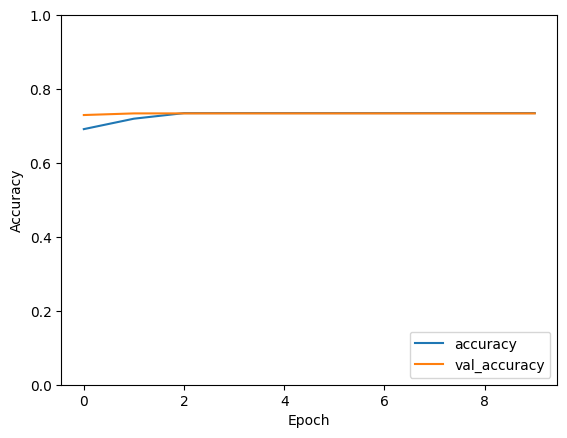

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50

# Ensure Kaggle API key is properly set up
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
os.system('cp kaggle.json ~/.kaggle/')
os.system('chmod 600 ~/.kaggle/kaggle.json')

# Download and extract the dataset
os.system('kaggle datasets download -d sovitrath/diabetic-retinopathy-2015-data-colored-resized')
os.system('unzip -q diabetic-retinopathy-2015-data-colored-resized.zip -d /content/')

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5  # Assuming 5 classes for diabetic retinopathy severity

# Create the base model
conv_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)

# Create the full model
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # Changed to NUM_CLASSES and softmax
])

# Freeze the conv_base layers
conv_base.trainable = False

# Data generators with proper splitting and preprocessing
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/colored_images/colored_images',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/colored_images/colored_images',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Normalize images
def process(image, label):
    return tf.cast(image / 255.0, tf.float32), label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds
)

# Optional: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

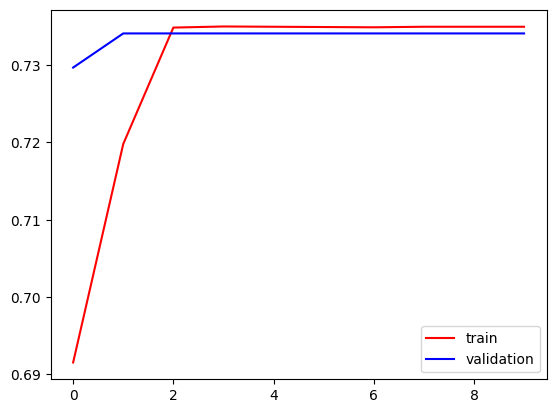

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

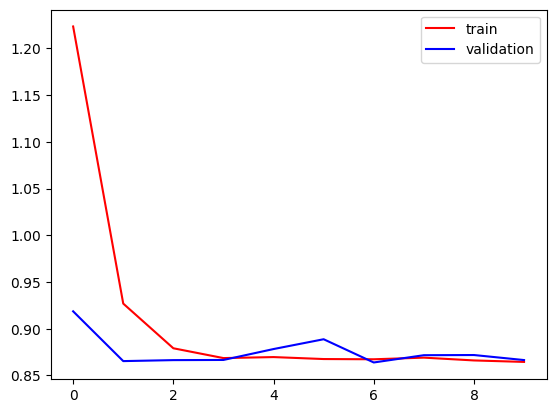

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()